<a href="https://colab.research.google.com/github/iznaraaa/Intro-ML-NN/blob/main/Copy_of_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Spatial data visualization

## 1-1 Interactive map useing Folium

In [ ]:
!pip install folium --user
# see more https://python-visualization.github.io/folium/quickstart.html

In [ ]:
import folium

In [ ]:
# coordinate of cuhk
lat_cuhk = 22.418707
lng_cuhk = 114.206954


# create a basemap focusing on this coordiante
map_plot1 = folium.Map(location=[lat_cuhk, lng_cuhk])

# add a basemap
google_road_map = 'http://mt.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'
folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot1)

# show the plot
map_plot1

In [ ]:
map_plot2 = folium.Map(location = [lat_cuhk, lng_cuhk], zoom_start = 14)
# you can try different level of zoom

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot2)

map_plot2

In [ ]:
# save the maps as HTML
map_plot2.save('cuhk.html')

## 1-2 Plot points

In [ ]:
map_plot3 = folium.Map(location = [lat_cuhk, lng_cuhk], zoom_start=16)

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot3)

GRM = [22.4149687, 114.2069146]
folium.Marker(GRM, popup="Here").add_to(map_plot3)

map_plot3

### Place search by Google

In [ ]:
import requests

YOUR_KEY = ''
BASE_URL = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?key={0}&location={1}&radius={2}&type={3}&keyword={4}'  


def jsonFormat(res):
  # return all the result in a dict with coordinate
  # {'a':[23.23,112.213], 'b':[31.552,127.831]}
  return


def nearBySearch(lat, lng, radius, placeType = '', keyword = ''):
  latlng = str(lat) + ',' + str(lng)
  url = BASE_URL.format(YOUR_KEY, latlng, radius, placeType, keyword)
  # print(url)
  response = requests.get(url,timeout=10)
  data = response.json()
  if data['status'] == 'OK':
    return jsonFormat(data)
  else:
    print("error: "+ url)
    return

lat_cuhk, lng_cuhk
radius_test = '500' #500 meters
typecode_test = 'restaurant' # lets get some restaurants


restaurants = nearBySearch(lat_cuhk, lng_cuhk, radius_test, typecode_test)
print(restaurants)

In [ ]:
map_plot4 = folium.Map(
    location = [lat_cuhk, lng_cuhk],
    zoom_start=16
    )

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot4)

for k in restaurants:
  folium.Marker(restaurants[k], tooltip=k).add_to(map_plot4)

map_plot4

### plot a lot of points

find some data from https://data.gov.hk/sc/geospatial-data

In [ ]:
import pandas as pd # https://pandas.pydata.org/docs/user_guide/10min.html

# get data from url
url="https://www.wastereduction.gov.hk/sites/default/files/wasteless.csv"
wasteless_df = pd.read_csv(url)

In [ ]:
wasteless_df.info()
wasteless_df

In [ ]:
for index, row in wasteless_df.iterrows(): # loop over pandas
    print(row['address_sc'], row['lat'], row['lgt'])

In [ ]:
map_plot5 = folium.Map(
    location = [lat_cuhk, lng_cuhk],
    zoom_start=12)

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot5)

for index, row in wasteless_df.iterrows(): # loop over pandas
  # print(row['address_sc'], row['lat'], row['lgt'])
  folium.Marker([row['lat'], row['lgt']], tooltip=row['address_sc']).add_to(map_plot5)

map_plot5 # wait for longer time

In [ ]:
wasteless_latlng = wasteless_df[['lat','lgt']].values.tolist()
wasteless_latlng

In [ ]:
from folium.plugins import FastMarkerCluster

map_plot6 = folium.Map(
    location = [lat_cuhk, lng_cuhk],
    zoom_start=12)

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot6)

FastMarkerCluster(data=wasteless_latlng).add_to(map_plot6)

map_plot6

In [ ]:
from folium.plugins import HeatMap

map_plot7 = folium.Map(location = [lat_cuhk, lng_cuhk], zoom_start=12)

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot7)

HeatMap(wasteless_latlng).add_to(map_plot7)

map_plot7

## 1-3 Draw lines

In [ ]:
map_plot8 = folium.Map()

folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot8)

points = [ # a list of points
    [30,120],
    [40,130],
    [20,70],
    [50,90]]

print(points)
folium.PolyLine(points, color='red', weight = 2.5).add_to(map_plot8)

map_plot8

In [ ]:
# load csv into pandas dataframe
url= "https://raw.githubusercontent.com/gyshion/tutorial/main/flights.csv" 
flight_df = pd.read_csv(url, sep=';')


flight_df # display the dataframe


In [ ]:
#loop over the dataframe and stop at the 100th iteration
for index, row in flight_df.iterrows():
    print(row['DepLat'],row['DepLon'],row['ArrLat'],row['ArrLon'])
    if index==10: # == for evaluating; = assigning 
        break # break the loop

In [ ]:
map_plot9 = folium.Map()
folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot9)

for index, row in flight_df.iterrows():
    pt = [
        [row['DepLat'],row['DepLon']],
        [row['ArrLat'],row['ArrLon']]]
    
    folium.PolyLine(pt, color='red',weight = row['NbFlights']/20).add_to(map_plot9)
    
    if index==1000:
        break # break the loop
map_plot9

In [ ]:
# filter condition and assign the flight color 
map_plot10 = folium.Map()
folium.TileLayer(tiles = google_road_map, attr = 'Google Maps').add_to(map_plot10)

wh_lat = 30.776497
wh_lng = 114.212525

for index, row in flight_df.iterrows():
    pt = [
        [row['DepLat'],row['DepLon']],
        [row['ArrLat'],row['ArrLon']]]
    
    if abs(row['DepLat']-wh_lat)<0.01 and abs(row['DepLon']-wh_lng)<0.01: # 0.01 degree ~ 1km
        c = 'red'
        w = row['NbFlights']/3
    else:
        c = 'gray'
        w = row['NbFlights']/20

    if row['NbFlights']<4 and c == 'gray': # plot all flights from Wu Han; and only the busy flights of other routes
        continue # skip the current iteration
        
    folium.PolyLine(pt, color=c,weight = w).add_to(map_plot10)
    

map_plot10

## 1-4 Basemaps

In [ ]:
# different types of basemap
tonerMap = folium.Map(location=[lat_cuhk, lng_cuhk], tiles="Stamen Toner")
tonerMap

In [ ]:
# different types of basemap
TerrainMap = folium.Map(location=[lat_cuhk, lng_cuhk], tiles="Stamen Terrain")
TerrainMap


In [ ]:
# popular basemap url
google_road_map = 'http://mt.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'
google_satallite_map = 'http://mt0.google.com/vt/lyrs=s&hl=en&x={x}&y={y}&z={z}'
gaode = 'http://wprd03.is.autonavi.com/appmaptile?style=7&x={x}&y={y}&z={z}' 
tencent = 'http://rt1.map.gtimg.com/tile?z={z}&x={x}&y={-y}&styleid=1&version=117'

ManyMaps = folium.Map(location=[22.1935149,113.5344088], zoom_start=16)

# add them as the optional basemap 
folium.TileLayer(tiles=google_road_map, attr='Google Map', name= 'Google Map').add_to(ManyMaps)
folium.TileLayer(tiles=google_satallite_map, attr='Google Satellite', name= 'Google Satellite').add_to(ManyMaps)
folium.TileLayer(tiles=gaode, attr='高德地图',name = '高德地图').add_to(ManyMaps)
folium.TileLayer(tiles=tencent, attr='腾讯地图',name = '腾讯地图').add_to(ManyMaps)
folium.LayerControl().add_to(ManyMaps)

ManyMaps

https://www.google.com/maps/@22.1935149,113.5344088,2037m/data=!3m1!1e3

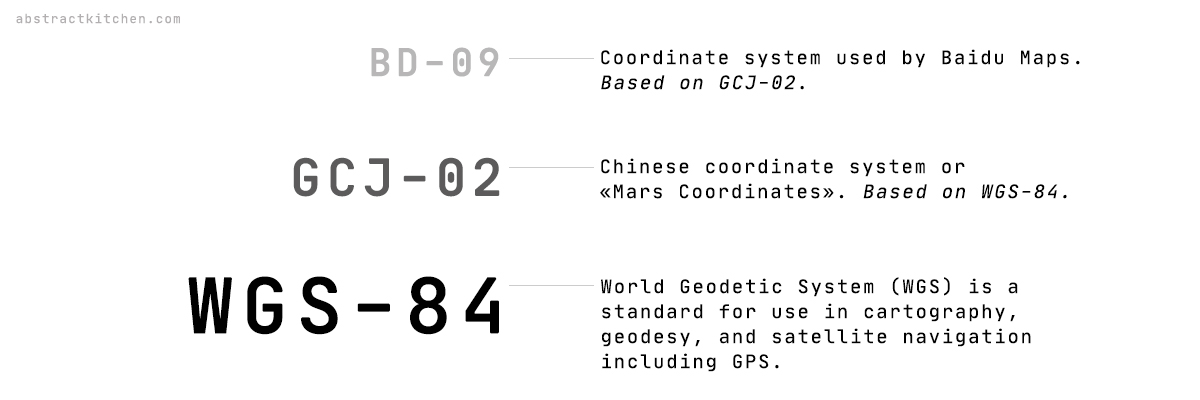

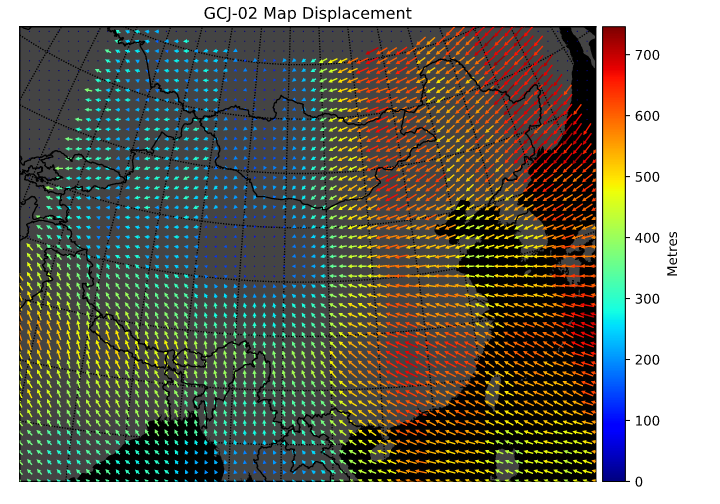

https://abstractkitchen.com/blog/a-short-guide-to-chinese-coordinate-system/

WGS84: International standard

GCJ02: Mainland China standard


In Mainland China:

Gaode & Tencent: GCJ02

Google Road Map: GCJ02

Google Satellite Map: WGS84

**Data collected from Google Maps API: GCJ02**

In [ ]:
# https://pypi.org/project/coord-convert/

!pip install coord_convert

In [ ]:
from coord_convert.transform import wgs2gcj, gcj2wgs
wgs_lng, wgs_lat = 120, 40
gcj_lng, gcj_lat = wgs2gcj(wgs_lng, wgs_lat) # lng first

print(gcj_lng, gcj_lat) # the result should be: 120.00567568355486 40.0013047896019

In [ ]:
print(gcj2wgs(gcj_lon, gcj_lat)) # small bias when converting

In [ ]:
import requests

def getGeoCoord(address,key):
  base_url = 'https://maps.googleapis.com/maps/api/geocode/json?'
  url = base_url+'address='+address.replace(' ', '+')+'&key='+key
  response = requests.get(url,timeout=10)
  data = response.json()
  if data['status'] == 'OK':
    result = data['results'][0]
    location = result['geometry']['location']
    return location['lat'], location['lng']
  else:
    print("error: "+address)
    return


lat_dfmz_gcj, lng_dfmz_gcj = getGeoCoord('东方明珠塔',YOUR_KEY)
print('GCJ', lat_dfmz_gcj, lng_dfmz_gcj)

lng_dfmz_wgs, lat_dfmz_wgs = gcj2wgs(lng_dfmz_gcj, lat_dfmz_gcj) # lng first for wgs2gcj/gcj2wgs function
print('WGS', lat_dfmz_wgs, lng_dfmz_wgs)


In [ ]:
compareMap = folium.Map(location=[lat_dfmz_wgs, lng_dfmz_wgs], zoom_start=16)

folium.TileLayer(tiles=google_road_map, attr='Google Map', name= 'Google Map').add_to(compareMap)
folium.TileLayer(tiles=google_satallite_map, attr='Google Satellite', name= 'Google Satellite').add_to(compareMap)
folium.TileLayer(tiles=gaode, attr='高德地图',name = '高德地图').add_to(compareMap)
folium.TileLayer(tiles=tencent, attr='腾讯地图',name = '腾讯地图').add_to(compareMap)
folium.LayerControl().add_to(compareMap)

folium.Marker([lat_dfmz_wgs, lng_dfmz_wgs], popup="WGS").add_to(compareMap)
folium.Marker([lat_dfmz_gcj, lng_dfmz_gcj], popup="GCJ").add_to(compareMap)

compareMap

*10min break*

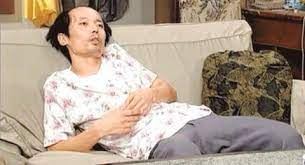

# 2 Collect many point data

In [ ]:
# If we try to collect restaurants

radius_test = '500' #500 meters
typecode_test = 'restaurant' # lets get some restaurants

restaurants = nearBySearch(lat_cuhk, lng_cuhk, radius_test, typecode_test)
print(len(restaurants))

In [ ]:
for radius_test in ['500', '1000', '2000']: #500, 1000, 2000 meters radius
  restaurants = nearBySearch(lat_cuhk, lng_cuhk, radius_test, typecode_test)
  print(len(restaurants))

https://developers.google.com/maps/documentation/places/web-service/search-nearby

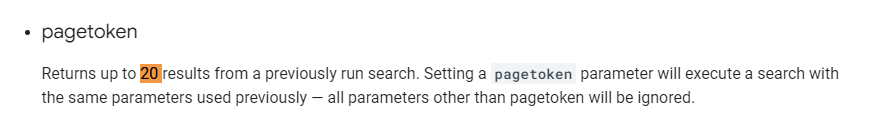

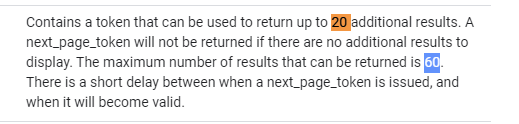

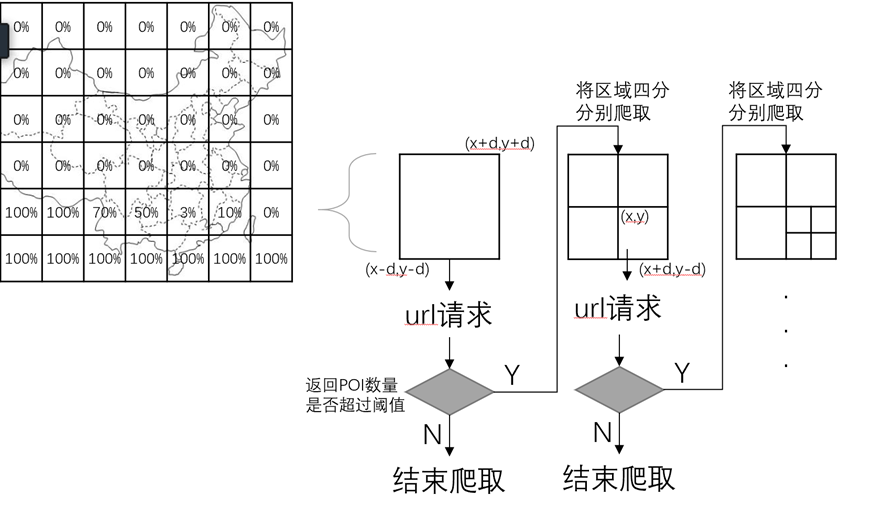

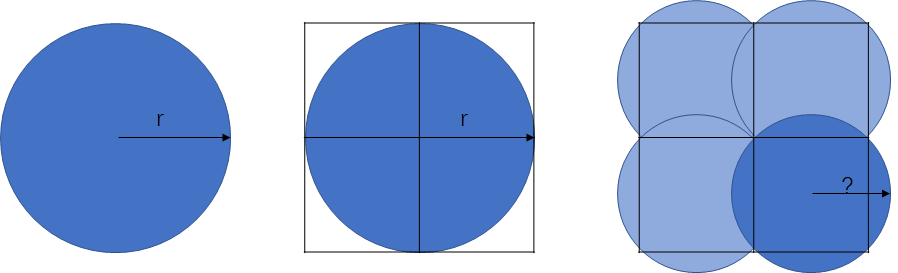

# Assignment 2

Huanan Seafood Market is locatted at lat:30.619779, lng:114.257871 (WGS coordinate), was suspected to be the source of the spreading of COVID-19.

1. Would you please find all of the hospitals within 2000 meters from the market
* google nearby search. see more: https://developers.google.com/places/web-service/search
* types field:"hospital" https://developers.google.com/places/web-service/supported_types


2. Plot all of the hospital names with their WGS locations on the base map of Gaode and Google satellite map

3. Calculate the GCJ coordiantes of those hospitals and plot them on the same map as step2 (don't create new map object)

4. Link the corresponding hospital among WGS and GCJ coordinates, and plot the link on the same map as step2 (don't create new map object)